In [1]:
import pandas as pd
import pandas_datareader as pdr

# 종목 타입에 따라 download url이 다름. 종목코드 뒤에 .KS .KQ등이 입력되어야해서 Download Link 구분 필요
stock_type = {
    'kospi': 'stockMkt',
    'kosdaq': 'kosdaqMkt'
}

# 회사명으로 주식 종목 코드를 획득할 수 있도록 하는 함수
def get_code(df, name):
  code = df.query("name=='{}'".format(name))['code'].to_string(index=False)

  # 위와같이 code명을 가져오면 앞에 공백이 붙어있는 상황이 발생하여 앞뒤로 sript() 하여 공백 제거
  code = code.strip()
  return code

# download url 조합
def get_download_stock(market_type=None):
  market_type_param = stock_type[market_type]
  download_link = 'http://kind.krx.co.kr/corpgeneral/corpList.do'
  download_link = download_link + '?method=download'
  download_link = download_link + '&marketType=' + market_type_param

  df = pd.read_html(download_link, header=0)[0]
  return df;

# kospi 종목코드 목록 다운로드
def get_download_kospi():
  df = get_download_stock('kospi')
  df.종목코드 = df.종목코드.map('{:06d}.KS'.format)
  return df

# kosdaq 종목코드 목록 다운로드
def get_download_kosdaq():
  df = get_download_stock('kosdaq')
  df.종목코드 = df.종목코드.map('{:06d}.KQ'.format)
  return df

In [2]:
# kospi, kosdaq 종목코드 각각 다운로드
kospi_df = get_download_kospi()
kosdaq_df = get_download_kosdaq()

# data frame merge
code_df = pd.concat([kospi_df, kosdaq_df])

# data frame정리
code_df = code_df[['회사명', '종목코드']]

# data frame title 변경 '회사명' = name, 종목코드 = 'code'
code_df = code_df.rename(columns={'회사명': 'name', '종목코드': 'code'})

code_df

,name,code
0,BGF리테일,282330.KS
1,DRB동일,004840.KS
2,E1,017940.KS
3,HDC,012630.KS
4,HD현대중공업,329180.KS
...,...,...
1709,헬릭스미스,084990.KQ
1710,현대이지웰,090850.KQ
1711,휴마시스,205470.KQ
1712,휴맥스홀딩스,028080.KQ


<Axes: >

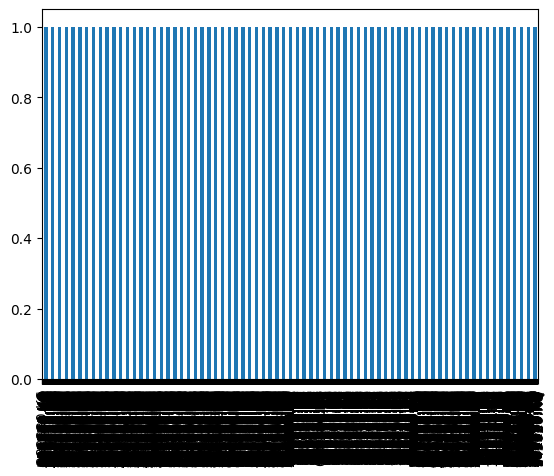

In [5]:
# @title Count of unique codes

code_df['code'].value_counts().plot(kind='bar')

In [6]:
code = get_code(code_df, '삼성전자')

df = pdr.get_data_yahoo(code)

df.plot()

TypeError: string indices must be integers

In [4]:
# 수정주가를 반영
df = pdr.get_data_yahoo(code, adjust_price=True)

df['Close'].plot(figsize=(10, 5))

TypeError: string indices must be integers